-----
<div> <center> ESPACIO PARA BANNER DE LA MAESTRIA </center> </div>   

-----

# Clustering: K-medoids. Fundamentos Teóricos.

El problema que busca solucionar k-medoides es bastante similar al de k-medias. Ambos algoritmos son particionales e intentan minimizar la distancia entre los puntos etiquetados para estar en un grupo y un punto designado como el centro de ese grupo. 

Por su lado, K-medias es apropiado cuando usamos como medida de disimilaridad el cuadrado de la distancia euclideana. Sin embargo, esto nos obliga a solo utilizar variables cuantitativas en nuestro análisis. Además, como usamos el cuadrado de la distancia como métrica, esto hace que sean las distancias más largas las más influyentes en nuestro proceso de segmentación. Por esto último, este algoritmo no es robusto a valores atípicos.

K-Medoides puede solucionar las deventajas de K-medias dado que puede hacer uso de medidas de disimilitud arbitrarias y además minimiza una suma de disimilitudes por pares (en lugar de una suma de distancias euclidianas al cuadrado) por lo que es robusto a valores atípicos. No obstante, estas bondades se dan a expensas de un mayor costo computacional.

El algoritmo que resuelve K-Medoids también conocido como PAM se presenta a continuación:
1. Para una asignación de conglomerado dada $C$, encuentre la observación central $i^*_k$ en el conglomerado minimizando la distancia total a otros puntos en ese conglomerado:
$$i^*_k = \argmin_{\{i: C(i) = k \}} \sum_{C(i') = k} D(x_i, x_i')$$

Luego $m_k = x_{i^*_k}$ para $k = 1, \dots, K$ son los centros estimados de cada cluster.

2. Dado un conjunto actual de centros de conglomerados $\{m_1,. . . , m_K\}$, minimice el error total asignando cada observación al centro del conglomerado más cercano:
$$C(i) = \argmin_{\{1 \leq k \leq K \}} D(x_i, m_k)$$

3. Itere los pasos 1 y 2 hasta que la asignación no cambie.

Note que, para K-medias, el único momento donde usamos la distancia Euclideana es en el paso de encontrar el centroide más cercano para cada observación. Por ende, el algoritmo de K-medoides es una generalización de K-medias en donde en el paso de minimización se deja abierta la posibilidad de usar cualquier medida de disimilaridad entre pares de observaciones. Adicionalmente, en vez de usar la media de las observaciones como centroide, K-medoides escoge la observación más central de cada segmento a partir del paso 1 del algoritmo descrito anteriormente.

En el siguiente ejemplo se puede ilustrar graficamente las diferencias entre cómo escogen los centroides cada algoritmo. A la izquierda se ve como K-Medias escogería el centroide del segmento y a la derecha como lo haría K-medoides. Note que para el primer caso, el punto central no es una observación del segmento y este centro se ve altmanete influenciado por un valor extremo. Para el segundo caso, la solución parece más acorde, sin embargo, para llegar a ella el proceso fue computacionalmente más demandante.

<center>
<img src="https://media.springernature.com/lw785/springer-static/image/prt%3A978-0-387-30164-8%2F12/MediaObjects/978-0-387-30164-8_12_Part_Fig1-426_HTML.gif" alt="centroides">
</center>

A continuación vamos a hacer un análisis de segmentación usando K-medoides. Partimos de una matriz de disimilitud entre países tomada de Kaufman y Rousseeuw (1990) en donde estudiantes de Ciencia Política calificaron las distancias ideologicas entre países.

In [29]:
import pandas as pd
df = pd.read_excel("data/dissimilarity_matrix.xlsx", index_col = 0)
df

,BEL,BRA,CHI,CUB,EGY,FRA,IND,ISR,USA,USS,YUG
BRA,558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHI,700,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUB,708,700.0,383.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EGY,483,508.0,817.0,583.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FRA,217,575.0,667.0,692.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN
IND,642,500.0,558.0,600.0,467.0,642.0,NaN,NaN,NaN,NaN,NaN
ISR,342,550.0,642.0,642.0,500.0,392.0,617.0,NaN,NaN,NaN,NaN
USA,250,492.0,625.0,733.0,450.0,225.0,633.0,275.0,NaN,NaN,NaN
USS,608,667.0,425.0,267.0,600.0,617.0,617.0,692.0,617.0,NaN,NaN
YUG,525,683.0,450.0,375.0,575.0,542.0,608.0,583.0,667.0,367.0,NaN


Aplicamos agrupamiento de 3 medoides a estas diferencias. Tenga en cuenta que la agrupación de K-medias no se pudo aplicar porque solo tenemos distancias en lugar de observaciones sin procesar.

In [75]:
import numpy as np
# Vamos a limpiar la matriz un poco
df_clean = df.loc[['BRA', 'CHI', 'CUB', 'EGY', 'FRA', 'IND', 'ISR', 'USA', 'USS', 'YUG'], 
       ['BRA', 'CHI', 'CUB', 'EGY', 'FRA', 'IND', 'ISR', 'USA', 'USS', 'YUG']]
df_clean = df_clean.fillna(0) + df_clean.T.fillna(0)
np.fill_diagonal(df_clean.values, 1)
df_clean

,BRA,CHI,CUB,EGY,FRA,IND,ISR,USA,USS,YUG
BRA,1.0,650.0,700.0,508.0,575.0,500.0,550.0,492.0,667.0,683.0
CHI,650.0,1.0,383.0,817.0,667.0,558.0,642.0,625.0,425.0,450.0
CUB,700.0,383.0,1.0,583.0,692.0,600.0,642.0,733.0,267.0,375.0
EGY,508.0,817.0,583.0,1.0,492.0,467.0,500.0,450.0,600.0,575.0
FRA,575.0,667.0,692.0,492.0,1.0,642.0,392.0,225.0,617.0,542.0
IND,500.0,558.0,600.0,467.0,642.0,1.0,617.0,633.0,617.0,608.0
ISR,550.0,642.0,642.0,500.0,392.0,617.0,1.0,275.0,692.0,583.0
USA,492.0,625.0,733.0,450.0,225.0,633.0,275.0,1.0,617.0,667.0
USS,667.0,425.0,267.0,600.0,617.0,617.0,692.0,617.0,1.0,367.0
YUG,683.0,450.0,375.0,575.0,542.0,608.0,583.0,667.0,367.0,1.0


In [76]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters = 3, metric = 'precomputed', random_state = 666).fit(df_clean)

In [83]:
from sklearn.manifold import MDS
mds = MDS(dissimilarity = 'precomputed', random_state = 666)
resultado = mds.fit_transform(df_clean)

In [104]:
list(zip(df_clean.columns, kmedoids.labels_))

[('BRA', 0),
 ('CHI', 2),
 ('CUB', 2),
 ('EGY', 0),
 ('FRA', 1),
 ('IND', 2),
 ('ISR', 0),
 ('USA', 0),
 ('USS', 2),
 ('YUG', 2)]

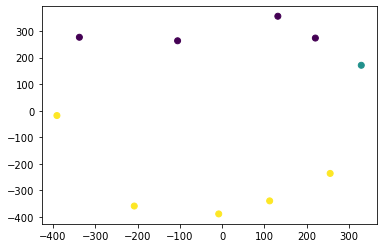

In [94]:
import matplotlib.pyplot as plt

plt.scatter(resultado[:,0], resultado[:,1], c = kmedoids.labels_)


**Referencias**
- Hastie, T., Friedman, J., &; Tisbshirani, R. (2017). The elements of Statistical Learning: Data Mining, Inference, and prediction. Springer. 
- Kaufman, L., &; Rousseeuw, P. J. (1990). Finding groups in data: An introduction to cluster analysis. Wiley. 